In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load data

In [83]:
df=pd.read_excel('HAR.xlsx')

In [84]:
df_test_1=pd.read_csv('gyro_front.csv')


In [85]:
df_test_1.head()

,timestamp,x,y,z,label
0,0,-0.026873,-0.018137,0.020563,stand
1,1,-0.030698,-0.016919,0.018079,stand
2,2,0.001272,0.008749,0.041660,stand
3,3,-0.024184,0.033113,0.019396,stand
4,4,-0.039518,0.027030,0.015577,stand


In [86]:
df_test_1.columns

Index(['timestamp', 'x', 'y', 'z', 'label'], dtype='object')

In [87]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],inplace=True)

In [88]:
df.shape

(2600, 5)

## Plot Axies of Accelerometer Dataset 

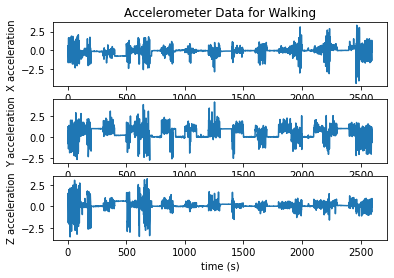

<Figure size 720x720 with 0 Axes>

In [89]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [90]:
X_acc= df_test_1['x'].values
Y_acc= df_test_1['y'].values
Z_acc= df_test_1['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [91]:
def Filter (Data):
        a=0.6  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [92]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

ValueError: x and y must have same first dimension, but have shapes (2600,) and (1479,)

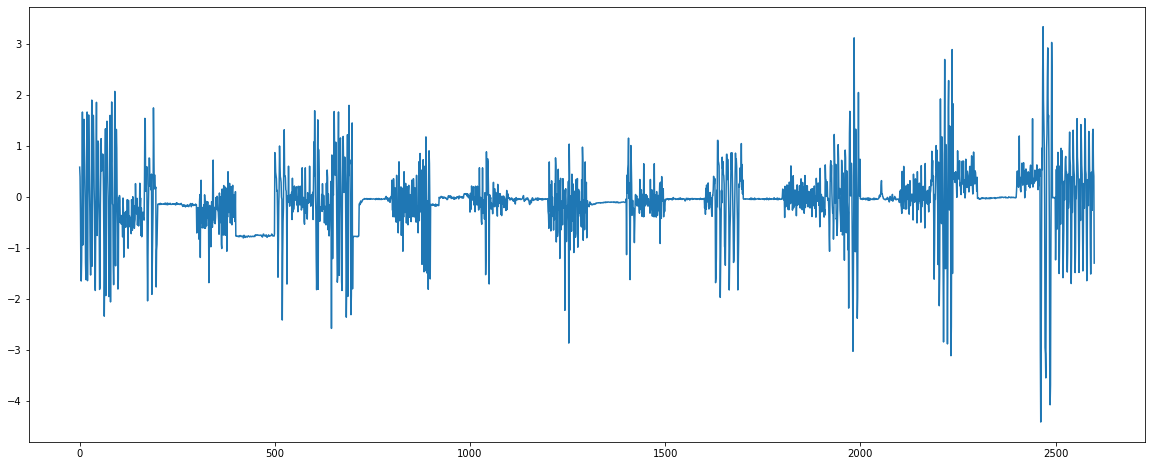

In [93]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (2600,) and (1479,)

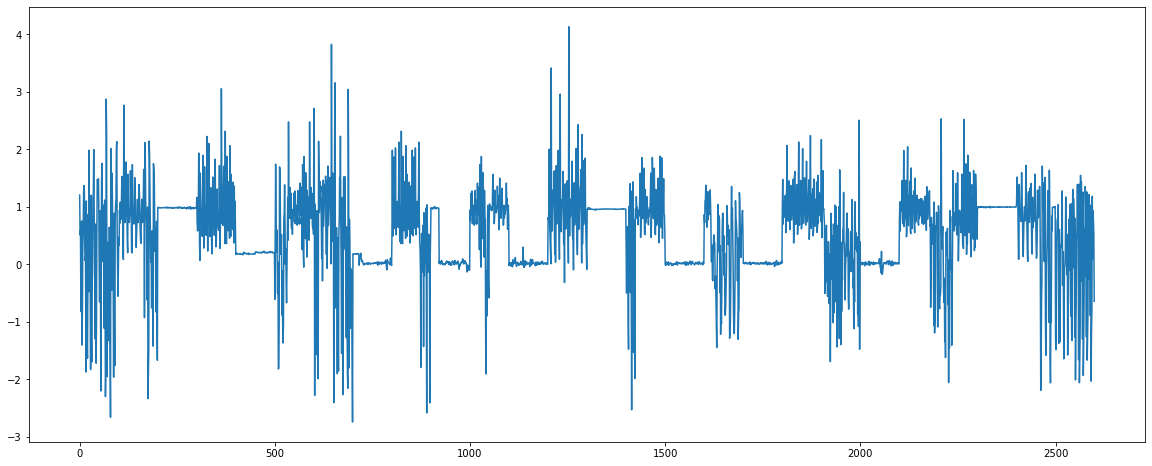

In [94]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [95]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 4)
Y_smoothed = gaussian_filter1d(Y_filtered, 4)
Z_smoothed = gaussian_filter1d(Z_filtered, 4)


ValueError: x and y must have same first dimension, but have shapes (2600,) and (1479,)

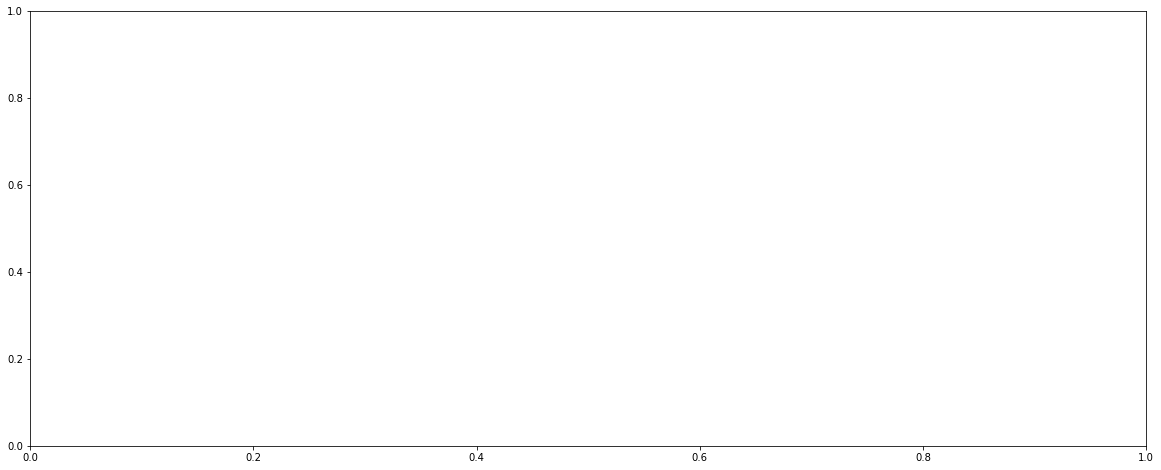

In [96]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2600,) and (1479,)

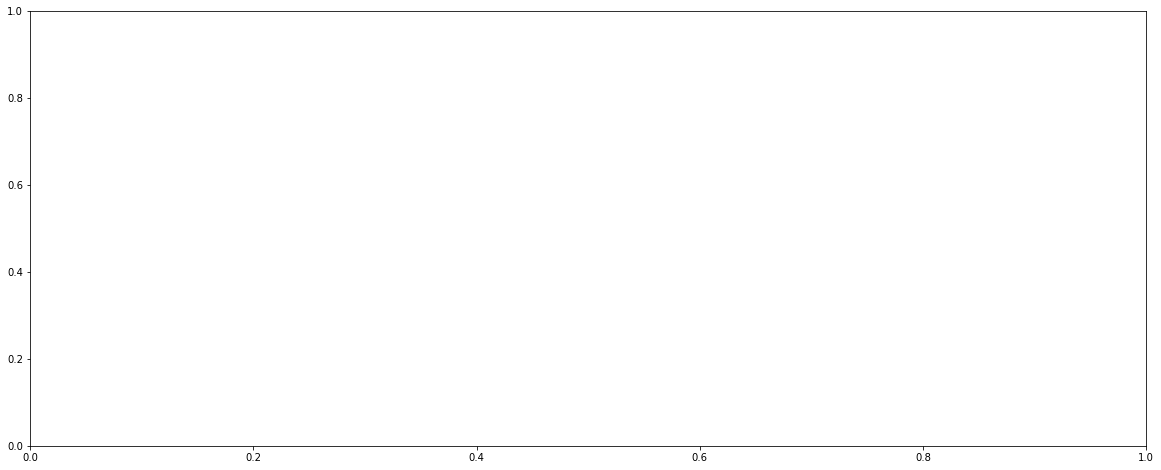

In [97]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [98]:
df_XYZ=df_test_1['x']*df_test_1['x']+df_test_1['y']*df_test_1['y']+df_test_1['z']*df_test_1['z']
XYZ=df_XYZ.apply(np.sqrt)

ValueError: x and y must have same first dimension, but have shapes (2600,) and (1479,)

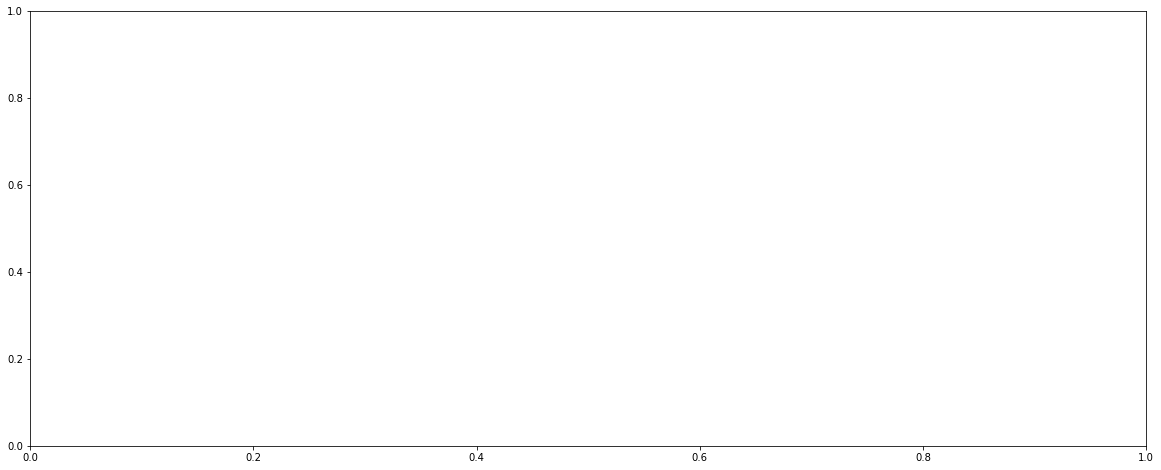

In [99]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')

plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [100]:

XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [101]:
xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [102]:
xyz_smoothed=xyz_smoothed.apply(np.sqrt)

In [103]:
plt.figure(figsize=(20,8))
plt.plot(df_test_1['timeElapsed'],xyz_smoothed,label='XYZ-Smoothed-Signal')

plt.title('Accelerometer XYZ smoothd signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

KeyError: 'timeElapsed'

<Figure size 1440x576 with 0 Axes>

## SET Peak And Valley for signal data & Perfom Segmentation 

In [104]:
peak=xyz_smoothed.values.flatten()

In [105]:
peak.shape

(1479,)

In [106]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [107]:
from scipy.signal import find_peaks,peak_widths,find_peaks_cwt
peak_x, _ = find_peaks(peak)  ##Detect Peaks
valley, _ = find_peaks(inv_peak) ##detect valley

In [108]:
peak_x

array([   9,   26,   37,   52,   59,   68,   82,   90,  113,  128,  165,
        173,  181,  196,  204,  220,  229,  235,  242,  255,  267,  273,
        279,  285,  294,  301,  309,  320,  327,  335,  351,  381,  400,
        406,  416,  423,  429,  433,  439,  450,  461,  469,  490,  499,
        507,  517,  528,  535,  547,  552,  562,  572,  581,  585,  591,
        598,  607,  618,  628,  636,  643,  652,  663,  670,  681,  687,
        692,  704,  710,  715,  723,  732,  739,  745,  755,  762,  769,
        778,  785,  791,  801,  808,  819,  824,  835,  842,  849,  852,
        859,  869,  882,  893,  903,  910,  927,  938,  944,  949,  962,
        972,  985,  995, 1002, 1008, 1018, 1031, 1041, 1052, 1059, 1066,
       1075, 1088, 1093, 1099, 1105, 1109, 1116, 1123, 1132, 1139, 1150,
       1161, 1173, 1178, 1185, 1191, 1201, 1208, 1215, 1225, 1236, 1244,
       1250, 1259, 1276, 1291, 1298, 1303, 1310, 1315, 1321, 1326, 1333,
       1339, 1346, 1353, 1363, 1370, 1381, 1392, 13

In [109]:
list_of_valley=list(valley)

In [110]:
len(list_of_valley)

162

In [111]:
t=df_test_1['timeElapsed']

KeyError: 'timeElapsed'

KeyError: (slice(None, None, None), None)

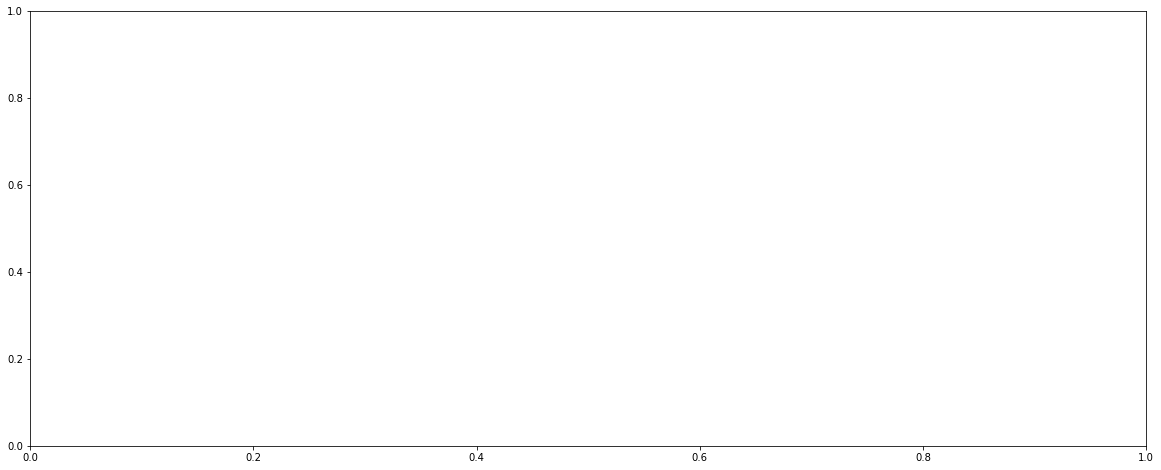

In [112]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
plt.plot(t[valley], peak[valley], 'b.',label='valley')

plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (2600,) and (1479,)

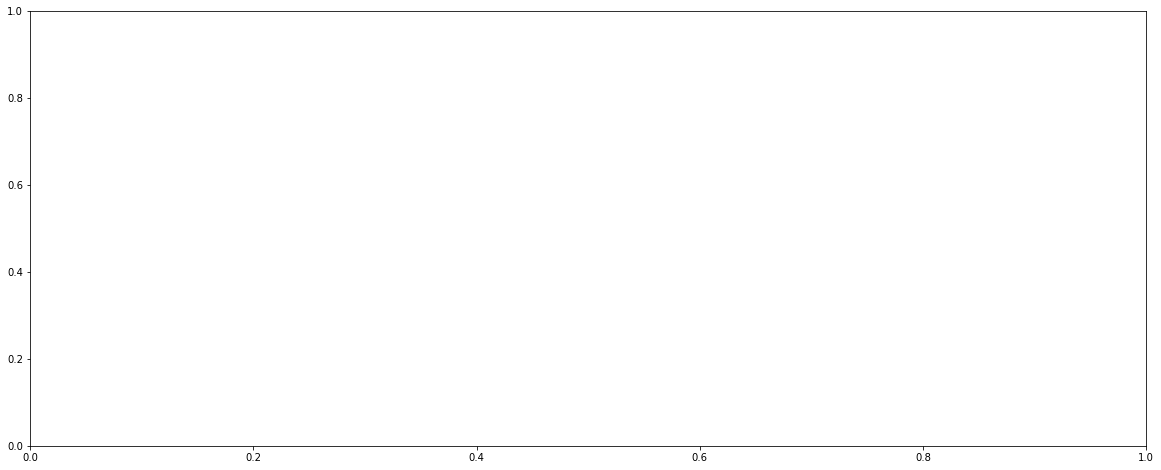

In [113]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [114]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
hight_xyz

[0.06068715671243078,
 0.10842137128067561,
 0.11441775541093355,
 0.05925418594862157,
 0.0658614653594023,
 0.04215638784624476,
 0.11595951450289604,
 0.1100882791836904,
 0.14440933850891785,
 0.12696056049747423,
 1.3139854019602677,
 0.9699268654652673,
 3.52296067593212,
 2.980532879660227,
 3.927289470945202,
 3.2905477254594286,
 1.0713192105276468,
 2.1900697648646505,
 3.914360963448261,
 2.4160364248181203,
 1.5874557209446019,
 2.514853915039364,
 0.8024463695114217,
 3.8167836218629176,
 2.6214309572961154,
 1.068201020970705,
 2.394027374882098,
 2.919828082699583,
 2.379831796601873,
 2.4348809284000996,
 3.389010216786712,
 3.575091828200454,
 2.774342754471586,
 2.613521464402481,
 2.938345564861147,
 2.3112459793053026,
 1.255680575269326,
 3.02593025549903,
 1.6893177065270262,
 3.256867047495969,
 3.522773055405525,
 3.738930947235,
 3.1582742954272724,
 3.2325858611735594,
 2.5161188196628204,
 2.8815908784086712,
 3.206556109607353,
 2.530297382399161,
 3.7552012

Calculate the Mean of every wave

In [115]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
mean_xyz

[0.0585465242926192,
 0.08213885260225218,
 0.09116513559419284,
 0.08093811525628751,
 0.08265535452473352,
 0.06816477293608207,
 0.0863490055583714,
 0.08316542208372073,
 0.07497458119828188,
 0.07234496255838868,
 0.2349512979312315,
 0.7593814118996731,
 1.322074266663399,
 1.5259835250207219,
 1.5412375763511876,
 1.3808546906832562,
 1.4857840941834997,
 1.4773374257392309,
 2.1380693098439716,
 2.09020002804546,
 2.0128909638843755,
 1.883403647057949,
 1.2880738014755035,
 1.6423076617718546,
 1.5202560252293726,
 1.7363445258836876,
 1.6423444323527008,
 2.001120385296303,
 1.2269466637056874,
 1.5281131672002515,
 1.7056462208888932,
 1.9124400295302493,
 2.4376862266680024,
 2.46955925299886,
 2.168022265901646,
 2.578179721138188,
 2.498623626970519,
 2.843315206859549,
 2.8225739624446984,
 2.400740295171702,
 2.4506240992580075,
 2.4173531630504446,
 2.692224434499638,
 2.4549348259415584,
 1.9630417460792475,
 2.484358612432235,
 2.438086442382811,
 2.5052766532825186,

Calculating the width of each wave

In [116]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])
width_xyz

[12,
 18,
 16,
 8,
 10,
 9,
 13,
 19,
 16,
 19,
 30,
 6,
 15,
 9,
 11,
 17,
 5,
 5,
 8,
 17,
 7,
 8,
 3,
 8,
 10,
 4,
 12,
 9,
 9,
 11,
 11,
 41,
 7,
 9,
 8,
 5,
 6,
 6,
 5,
 11,
 11,
 18,
 13,
 9,
 6,
 11,
 11,
 5,
 13,
 9,
 7,
 11,
 5,
 6,
 6,
 9,
 9,
 10,
 10,
 7,
 10,
 7,
 10,
 8,
 9,
 5,
 10,
 10,
 4,
 7,
 10,
 7,
 4,
 12,
 6,
 8,
 4,
 11,
 9,
 5,
 10,
 8,
 7,
 9,
 10,
 6,
 5,
 7,
 6,
 10,
 17,
 7,
 8,
 11,
 20,
 5,
 5,
 7,
 15,
 9,
 15,
 7,
 4,
 12,
 8,
 14,
 9,
 9,
 7,
 9,
 9,
 10,
 7,
 5,
 4,
 6,
 8,
 8,
 7,
 9,
 9,
 15,
 7,
 7,
 6,
 7,
 8,
 9,
 5,
 15,
 8,
 5,
 10,
 9,
 26,
 5,
 6,
 7,
 4,
 5,
 8,
 5,
 5,
 6,
 9,
 8,
 9,
 10,
 7,
 12,
 6,
 7,
 5,
 13,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 6]

Calculating The standered deviassion of each wave

In [117]:
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
std_xyz

[0.020846142337700203,
 0.033788647747413164,
 0.041588712933445855,
 0.02125007836757353,
 0.01866205171465598,
 0.014112144128042254,
 0.03478594960378952,
 0.031378821967553976,
 0.03565189346813928,
 0.02994628658464464,
 0.3017595937653886,
 0.32437739695450973,
 0.8127509457758981,
 0.9916463432288746,
 1.2063051783318828,
 0.9336337535623527,
 0.4832220164794612,
 0.8589875831488829,
 1.1479297939732451,
 0.7107230635029349,
 0.6209546353700361,
 0.958017536557967,
 0.4240127483968533,
 1.267375731049823,
 0.8428726413301508,
 0.50006923618683,
 0.681074413192464,
 0.8859931676226603,
 0.8172688218134861,
 0.7836620010815962,
 1.0329325982383402,
 0.9121672216559341,
 1.1327632945902266,
 0.8264830611233154,
 0.9018019826228921,
 1.012130557971723,
 0.570781193661154,
 1.0410811028959308,
 0.6998248629042831,
 1.0157190668377087,
 0.9980776037163279,
 1.0584332063631496,
 0.943541484545525,
 0.9665544991465436,
 0.8887940671299553,
 0.8877663337911982,
 0.9491487473834495,
 1.02

In [118]:
list_of_valley

[12,
 30,
 46,
 54,
 64,
 73,
 86,
 105,
 121,
 140,
 170,
 176,
 191,
 200,
 211,
 228,
 233,
 238,
 246,
 263,
 270,
 278,
 281,
 289,
 299,
 303,
 315,
 324,
 333,
 344,
 355,
 396,
 403,
 412,
 420,
 425,
 431,
 437,
 442,
 453,
 464,
 482,
 495,
 504,
 510,
 521,
 532,
 537,
 550,
 559,
 566,
 577,
 582,
 588,
 594,
 603,
 612,
 622,
 632,
 639,
 649,
 656,
 666,
 674,
 683,
 688,
 698,
 708,
 712,
 719,
 729,
 736,
 740,
 752,
 758,
 766,
 770,
 781,
 790,
 795,
 805,
 813,
 820,
 829,
 839,
 845,
 850,
 857,
 863,
 873,
 890,
 897,
 905,
 916,
 936,
 941,
 946,
 953,
 968,
 977,
 992,
 999,
 1003,
 1015,
 1023,
 1037,
 1046,
 1055,
 1062,
 1071,
 1080,
 1090,
 1097,
 1102,
 1106,
 1112,
 1120,
 1128,
 1135,
 1144,
 1153,
 1168,
 1175,
 1182,
 1188,
 1195,
 1203,
 1212,
 1217,
 1232,
 1240,
 1245,
 1255,
 1264,
 1290,
 1295,
 1301,
 1308,
 1312,
 1317,
 1325,
 1330,
 1335,
 1341,
 1350,
 1358,
 1367,
 1377,
 1384,
 1396,
 1402,
 1409,
 1414,
 1427,
 1432,
 1438,
 1444,
 1449,
 14

In [119]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [120]:
df_feature.shape

(162, 4)

In [121]:
list_of_label=[]

In [122]:
counter=0
for i in  list_of_valley:
    x=df_test_1['label'].loc[i]
    list_of_label.append(x)  

    

In [123]:
for i in range(0,len(list_of_valley)):
    print(str(i)+'------>'+str(list_of_valley[i])+'------>'+str(list_of_label[i]))

0------>12------>stand
1------>30------>stand
2------>46------>stand
3------>54------>stand
4------>64------>stand
5------>73------>stand
6------>86------>stand
7------>105------>stand
8------>121------>stand
9------>140------>stand
10------>170------>walk
11------>176------>stairDown
12------>191------>stairDown
13------>200------>stairDown
14------>211------>stairDown
15------>228------>stairDown
16------>233------>stairDown
17------>238------>walk
18------>246------>walk
19------>263------>walk
20------>270------>stairDown
21------>278------>stairDown
22------>281------>stairDown
23------>289------>stairDown
24------>299------>stairDown
25------>303------>stairDown
26------>315------>walk
27------>324------>stairDown
28------>333------>stairDown
29------>344------>stairDown
30------>355------>stairDown
31------>396------>walk
32------>403------>walk
33------>412------>walk
34------>420------>walk
35------>425------>walk
36------>431------>walk
37------>437------>walk
38------>442---

In [124]:
df['label'].iloc[194]

'stairUp'

In [125]:
df_feature['label']=list_of_label

In [126]:
df_feature.shape

(162, 5)

In [127]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,0.058547,0.020846,0.060687,12,stand
1,0.082139,0.033789,0.108421,18,stand
2,0.091165,0.041589,0.114418,16,stand
3,0.080938,0.021250,0.059254,8,stand
4,0.082655,0.018662,0.065861,10,stand


In [132]:
X=df_feature.drop(columns=['label']).values
y=df_feature['label']

In [135]:
X.shape

(162, 4)

In [136]:
y.shape

(162,)

# Classification Phase

### Splitting data to train and test

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=49)

In [49]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (135, 4)
X_test_shape ----> (16, 4)
Y_train_shape ----> (135,)
Y_test_shape ----> (16,)


### Preprocessimg label data and feature

In [137]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y)
# y_labeled_test=le.transform(y_test)
y_labeled.shape


(162,)

In [138]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X)
# x_Scaler_test=sc.transform(X_test)
x_Scaler_train.shape


(162, 4)

### Using Support vector machine Classification

Cross validation for train data is :  [0.48888889 0.53333333 0.51111111]
Cross validation for test data is :  [0.5 0.6 0.6]
Confusion matrix is :  [[3 0 0 1 0]
 [0 4 1 0 0]
 [0 0 2 0 1]
 [0 0 0 1 0]
 [0 0 2 0 1]]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


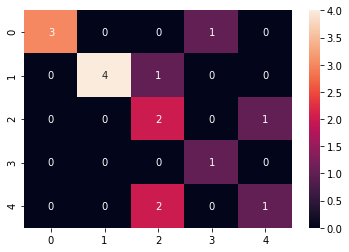

In [52]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_svm_train)
cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_svm_test)
y_pred = classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)


In [53]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)


### Using KNN Classification

Cross validation for train data is :  [0.48888889 0.53333333 0.57777778]
Cross validation for test data is :  [0.5 0.6 0.6]
Confusion matrix is :  [[3 0 0 1 0]
 [0 3 2 0 0]
 [1 0 1 0 1]
 [0 0 0 1 0]
 [0 1 1 0 1]]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


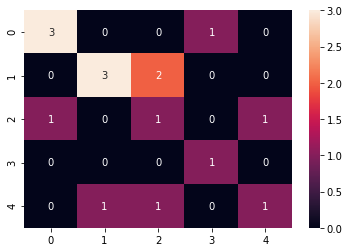

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_knn_train)
cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_knn_test)
y_pred = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [55]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)

### Using Random forest Classifier

Cross validation for train data is :  [0.51111111 0.48888889 0.44444444]
Cross validation for test data is :  [0.5 0.6 0.4]
Confusion matrix is :  [[3 0 0 1 0]
 [0 3 2 0 0]
 [1 0 2 0 0]
 [0 0 0 1 0]
 [0 1 1 0 1]]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


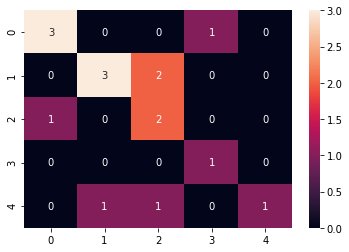

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 17, criterion = 'entropy', random_state = 0)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_rf_train)
cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_rf_test)
y_pred = classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [57]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)

### Using Decision Tree Classifier

Cross validation for train data is :  [0.48888889 0.57777778 0.42222222]
Cross validation for test data is :  [0.66666667 0.6        0.4       ]
Confusion matrix is :  [[3 0 0 0 1]
 [0 4 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 2]]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


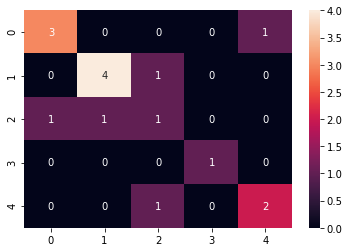

In [58]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 5)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_dt_train)
cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_dt_test)
y_pred = classifier_DT.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [59]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

### Using Navie Bayes Classifier

Cross validation for train data is :  [0.33333333 0.57777778 0.42222222]
Cross validation for test data is :  [0.66666667 0.4        0.6       ]
Confusion matrix is :  [[3 0 0 1 0]
 [0 2 1 0 2]
 [1 0 2 0 0]
 [0 0 0 1 0]
 [0 2 0 0 1]]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


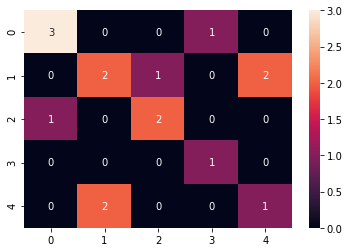

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_nv_train)
cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_nv_test)
y_pred = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [61]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)

### Showing Accuracy using accuracy_score

In [62]:
classifier_RFfrom sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',accuracy_score(y_labeled_test, y_pred_SVC))
print('Accuracy of Desicion Tree--------->',accuracy_score(y_labeled_test, y_pred_DT))
print('Accuracy of Random forest--------->',accuracy_score(y_labeled_test, y_pred_RF))
print('Accuracy of KNN          --------->',accuracy_score(y_labeled_test, y_pred_Knn))
print('Accuracy of Navie Bayes  --------->',accuracy_score(y_labeled_test, y_pred_NB))  

Accuracy of SVC          ---------> 0.6875
Accuracy of Desicion Tree---------> 0.6875
Accuracy of Random forest---------> 0.625
Accuracy of KNN          ---------> 0.5625
Accuracy of Navie Bayes  ---------> 0.5625


In [142]:
y_prediction_test_SVC=classifier_SVC.predict(x_Scaler_train)
y_prediction_test_KNN=classifier_KNN.predict(x_Scaler_train)
y_prediction_test_RF=classifier_RF.predict(x_Scaler_train)
y_prediction_test_DT=classifier_DT.predict(x_Scaler_train)
y_prediction_test_NB=classifier_NB.predict(x_Scaler_train)


In [143]:
print('Accuracy of SVC          --------->',accuracy_score(y_labeled, y_prediction_test_SVC))
print('Accuracy of Desicion Tree--------->',accuracy_score(y_labeled, y_prediction_test_KNN))
print('Accuracy of Random forest--------->',accuracy_score(y_labeled, y_prediction_test_RF))
print('Accuracy of KNN          --------->',accuracy_score(y_labeled, y_prediction_test_DT))
print('Accuracy of Navie Bayes  --------->',accuracy_score(y_labeled, y_prediction_test_NB))  

Accuracy of SVC          ---------> 0.05555555555555555
Accuracy of Desicion Tree---------> 0.08641975308641975
Accuracy of Random forest---------> 0.08641975308641975
Accuracy of KNN          ---------> 0.06790123456790123
Accuracy of Navie Bayes  ---------> 0.10493827160493827


In [139]:
y_prediction_test_DT.shape

(151,)